In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [140]:
with open("./result.json", "r") as file:
    result_file = json.loads(file.read())

In [141]:
result_df = pd.json_normalize(result_file['results'])
result_df.rename(columns=lambda c: c.replace('config.', ''), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df.head()

,max_possible_throughput,expected_throughput,avg_throughput,controller,state,mission_size,num_agents,sensor_generation_frequency,sensor_generation_probability,sensor_packet_lifecycle,...,reward_function,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose,repetitions,controller.avg_reward
0,3.0,1.8,0.658735,<class 'QLearning.QLearning'>,<class 'state.CommunicationMobilityState'>,10,1,3,0.6,inf,...,<function throughput_reward at 0x0000024AD5E3A...,0,0.json,sparse,True,False,False,False,0,0.219428
1,3.0,1.8,1.799005,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,inf,...,<function throughput_reward at 0x0000017CFDBCA...,0,184.json,sparse,True,False,False,False,1,0.599668
2,3.0,1.8,0.197146,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,inf,...,<function throughput_reward at 0x000001F6E653A...,0,183.json,sparse,False,False,False,False,1,0.065709
3,3.0,1.8,1.798311,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,inf,...,<function throughput_reward at 0x000001F6E653A...,0,183.json,sparse,True,False,False,False,1,0.599437
4,3.0,1.8,0.198643,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,inf,...,<function throughput_reward at 0x000002797382A...,0,182.json,sparse,False,False,False,False,0,0.066208


In [142]:
variable_columns = result_file['campaign_variables']
variable_columns

['maximum_simulation_steps',
 'state',
 'mission_size',
 'repetitions',
 'learning_rate',
 'training']

In [143]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,max_possible_throughput,expected_throughput,avg_throughput,controller,state,mission_size,num_agents,sensor_generation_frequency,sensor_generation_probability,...,reward_function,qtable_initialization_value,qtable_file,qtable_format,training,step_by_step,plots,verbose,repetitions,controller.avg_reward
0,0,3.0,1.8,0.658735,<class 'QLearning.QLearning'>,<class 'state.CommunicationMobilityState'>,10,1,3,0.6,...,<function throughput_reward at 0x0000024AD5E3A...,0,0.json,sparse,True,False,False,False,0,0.219428
1,1,3.0,1.8,1.799005,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,...,<function throughput_reward at 0x0000017CFDBCA...,0,184.json,sparse,True,False,False,False,1,0.599668
2,2,3.0,1.8,0.197146,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,...,<function throughput_reward at 0x000001F6E653A...,0,183.json,sparse,False,False,False,False,1,0.065709
3,3,3.0,1.8,1.798311,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,...,<function throughput_reward at 0x000001F6E653A...,0,183.json,sparse,True,False,False,False,1,0.599437
4,4,3.0,1.8,0.198643,<class 'QLearning.QLearning'>,<class 'state.MobilityState'>,10,1,3,0.6,...,<function throughput_reward at 0x000002797382A...,0,182.json,sparse,False,False,False,False,0,0.066208


In [144]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['expected_throughput'],
    name='Expected Throughput',
    hovertemplate='<b>Expected Throughput: %{y}</b><extra></extra>'
))


campaign_hovertemplate = '<b>Avg. Throughput: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['avg_throughput'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(len(result_df))],
   tickvals=[i for i in range(len(result_df))],
)

fig.show()

In [145]:
result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

In [146]:
fig = go.Figure()

campaign_hovertemplate = '<b>Score: %{y}</b><br>'
for index, column in enumerate(variable_columns):
    campaign_hovertemplate += column + ': %{customdata['+ str(index) + ']}<br>'
campaign_hovertemplate += '<extra></extra>'

fig.add_trace(go.Bar(
    x=result_df['campaign_id'],
    y=result_df['score'],
    name='Avg. Throughput',
    customdata=result_df[variable_columns],
    hovertemplate=campaign_hovertemplate
))

fig.update_layout(
    barmode='overlay',
    xaxis_title='Campaign ID',
    yaxis_title='Throughput (packets/step)',
    hovermode='x'
)

fig.update_xaxes(
   ticktext=[str(i) for i in range(24)],
   tickvals=[i for i in range(24)],
)

fig.show()

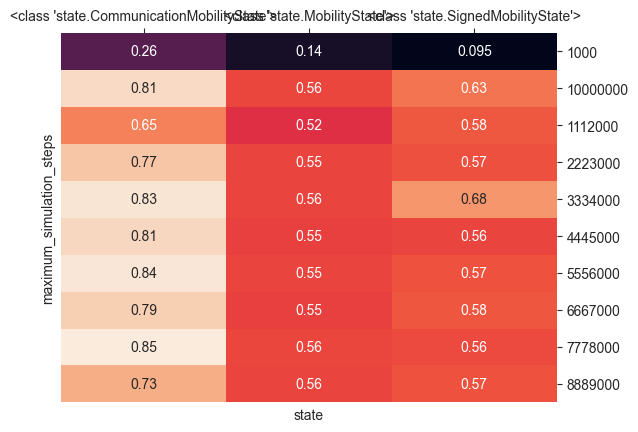

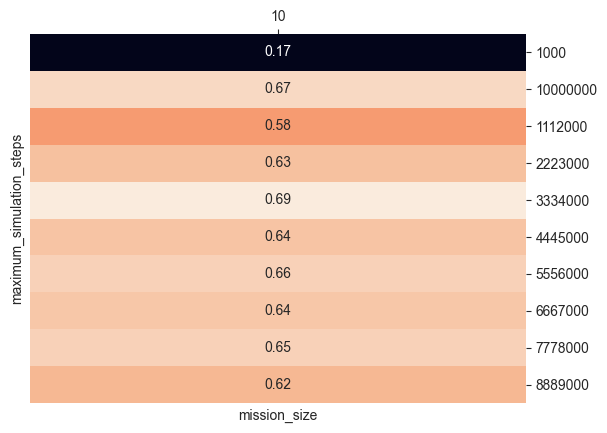

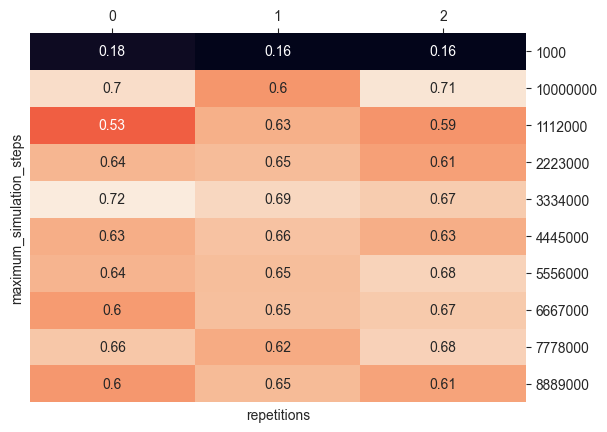

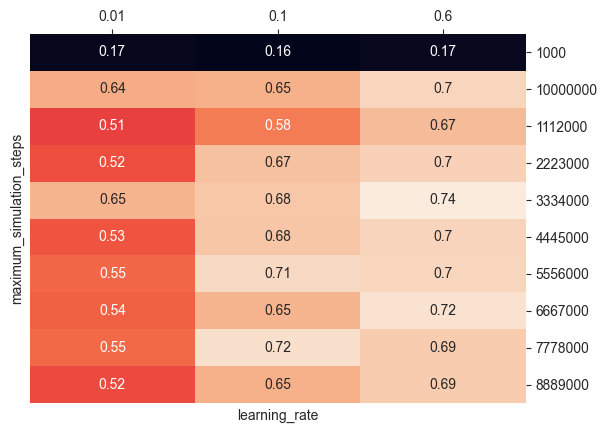

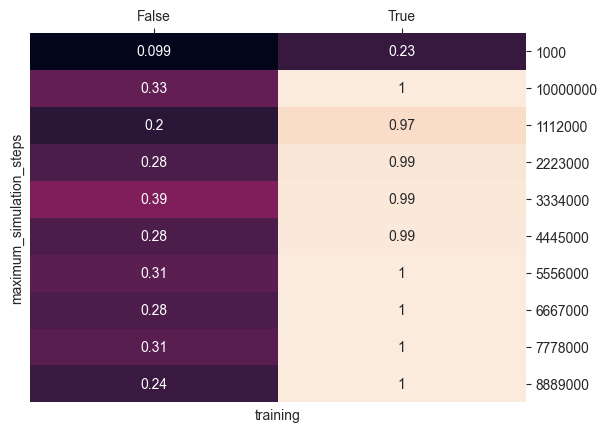

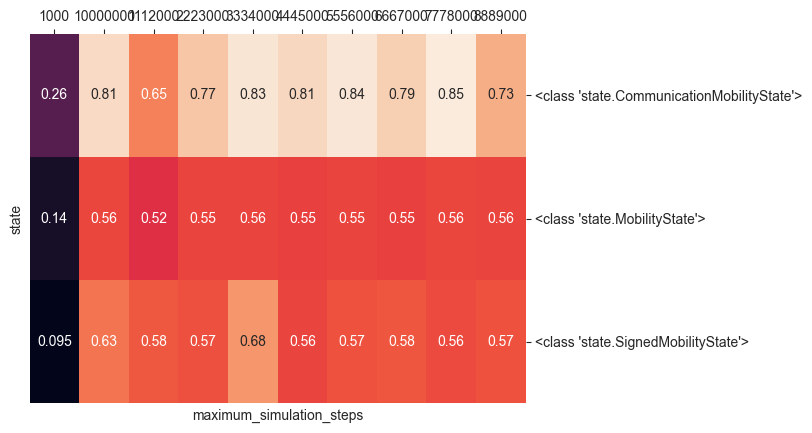

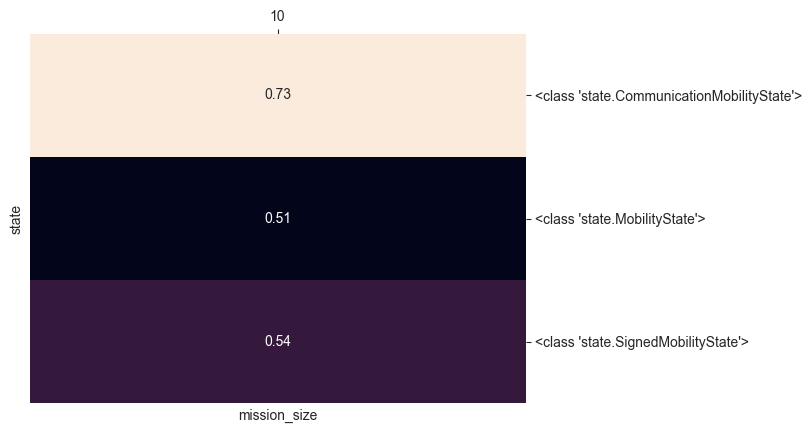

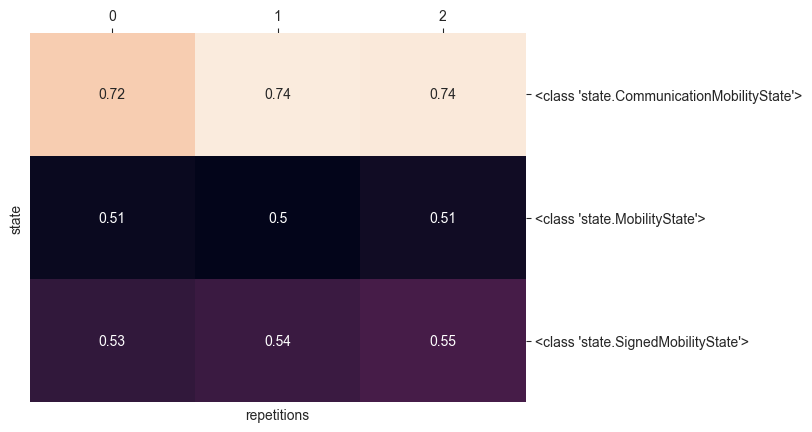

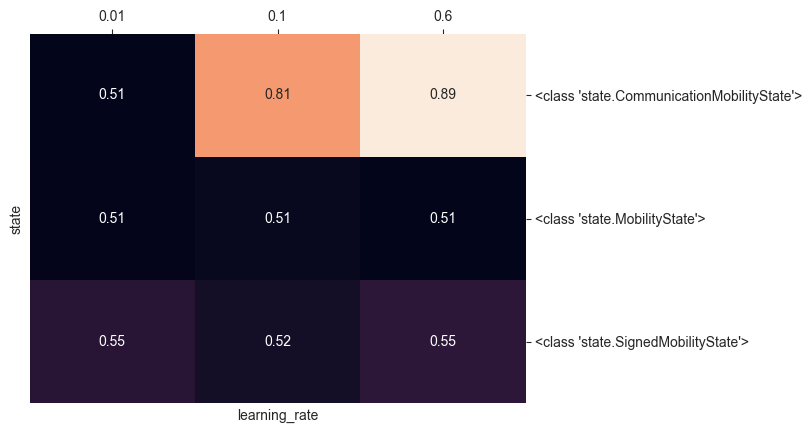

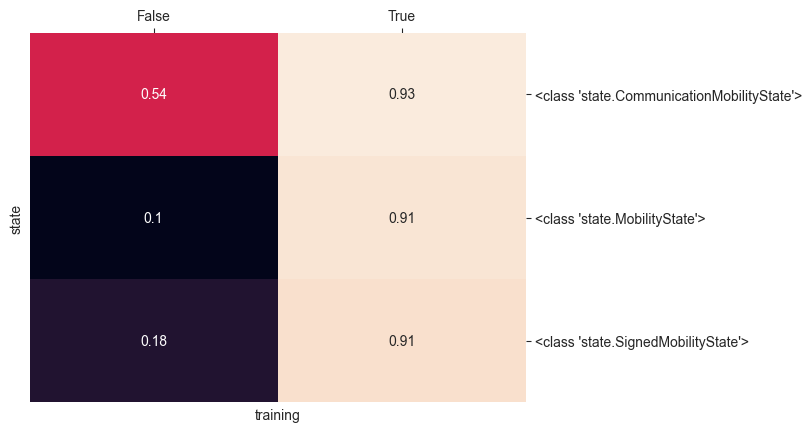

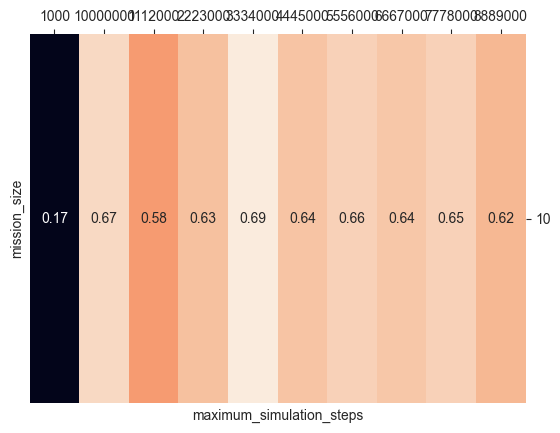

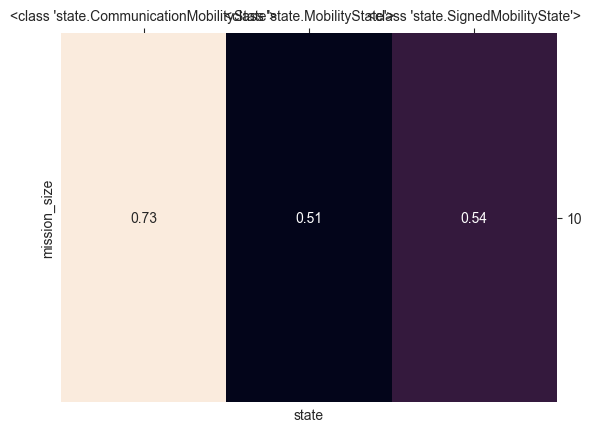

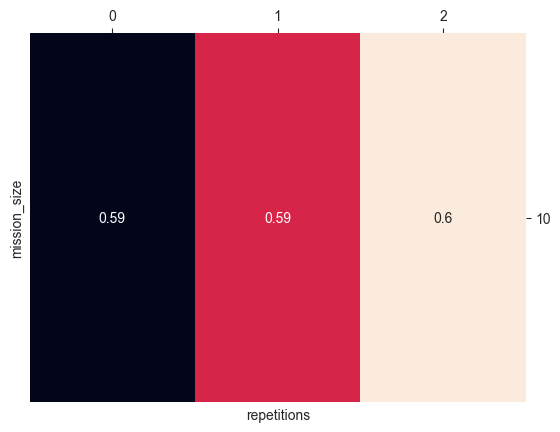

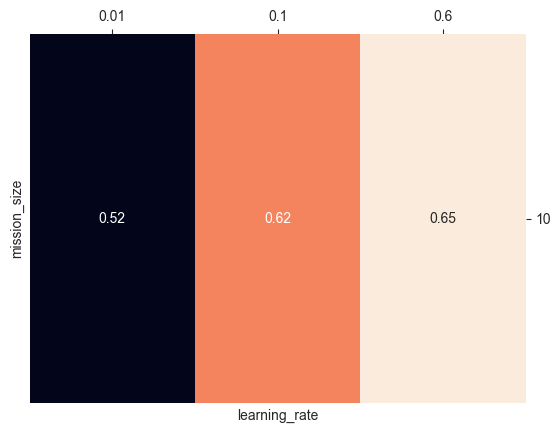

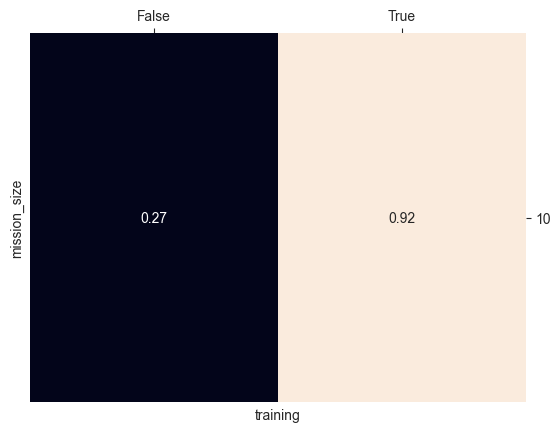

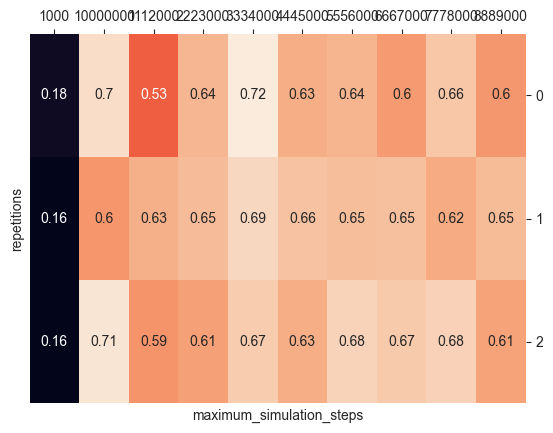

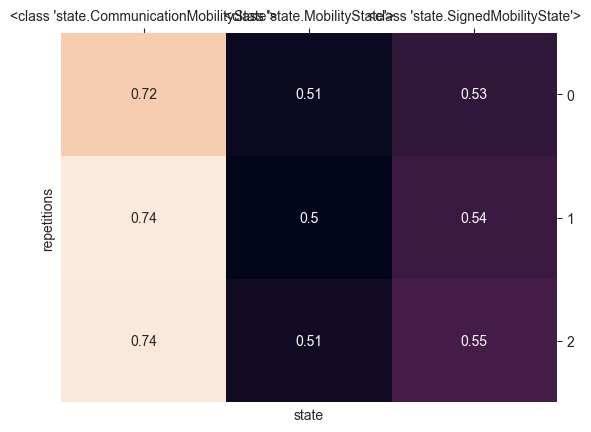

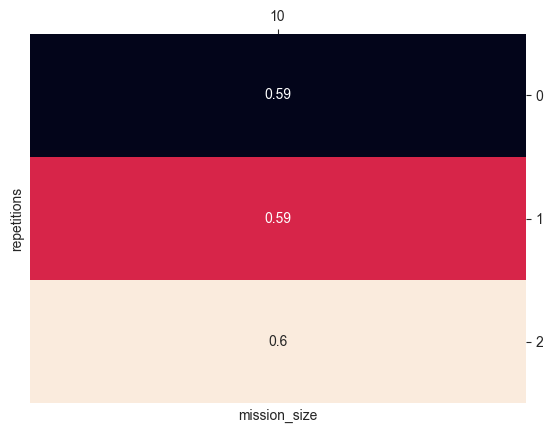

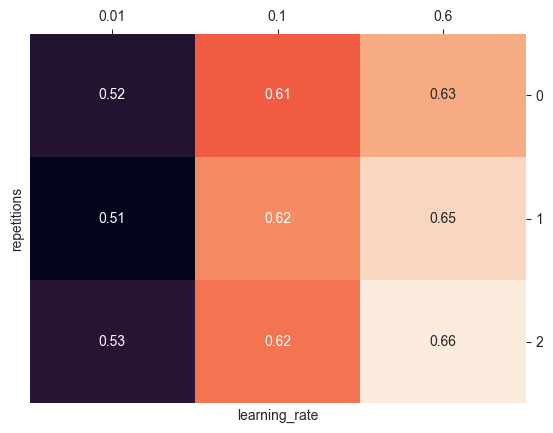

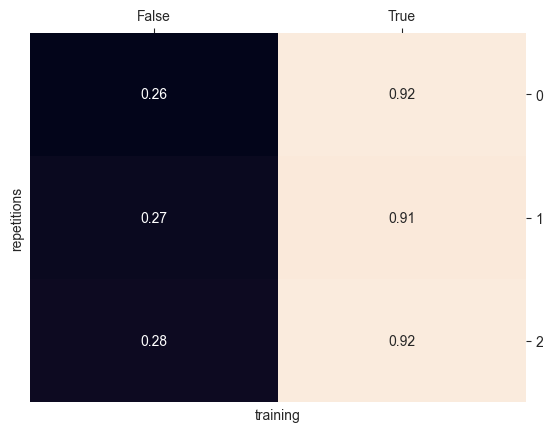

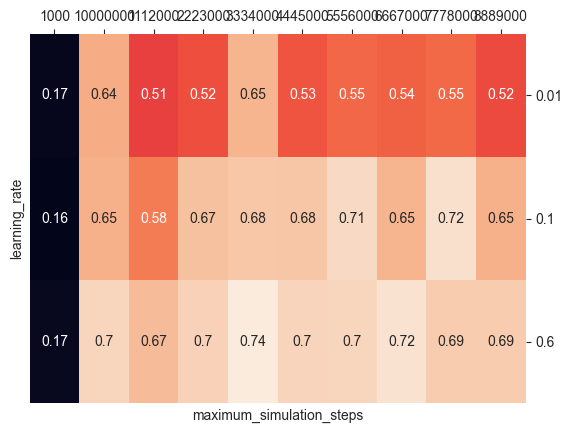

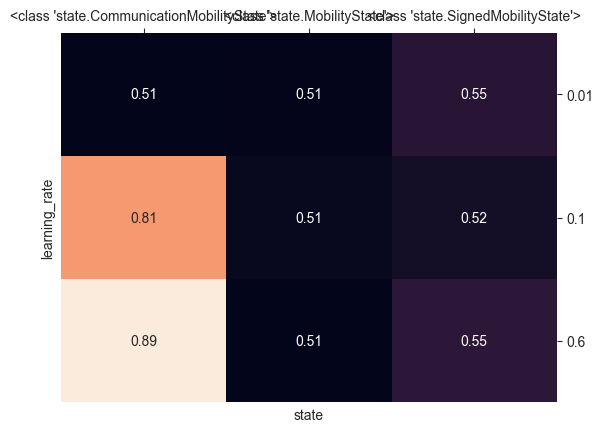

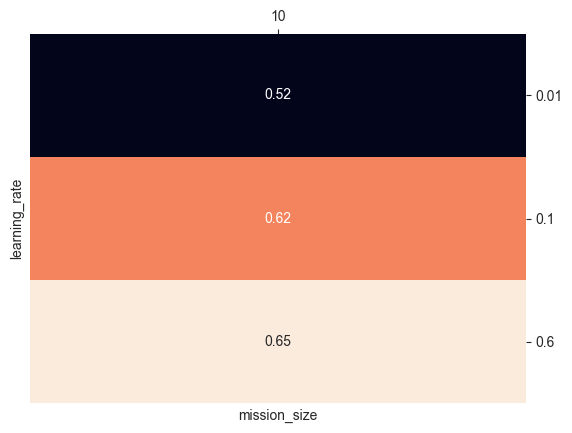

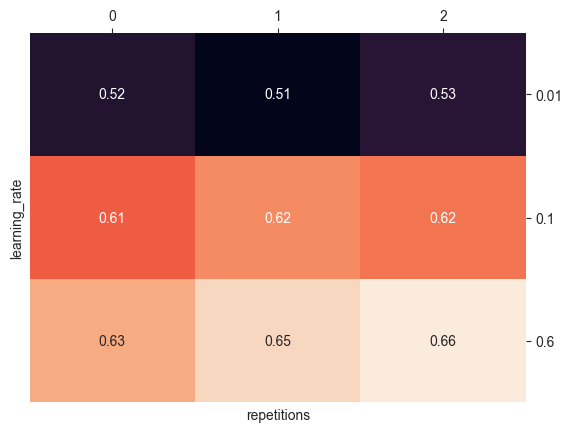

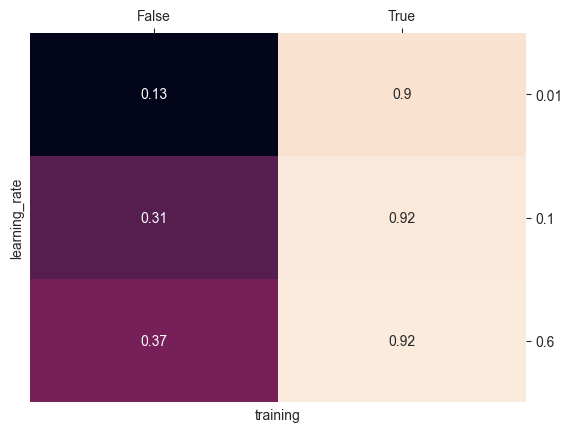

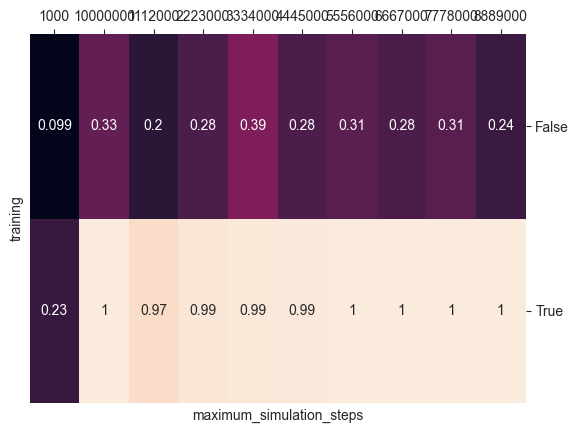

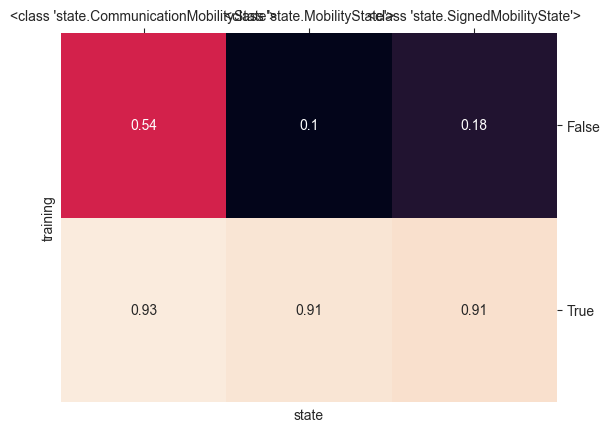

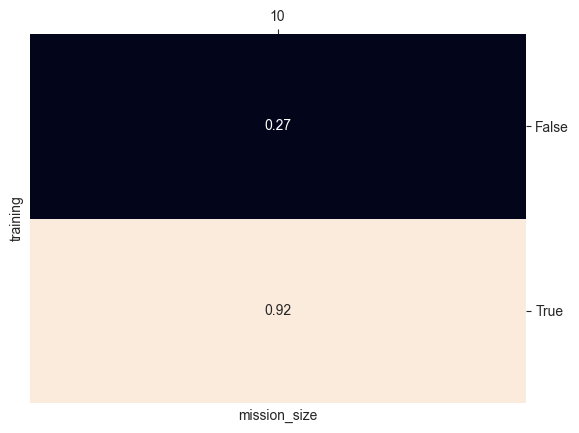

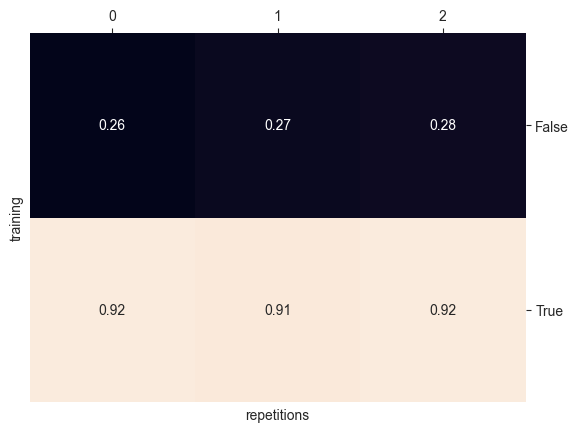

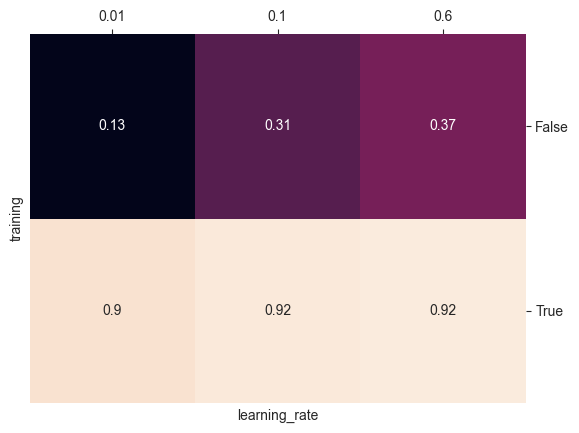

In [147]:
for column in variable_columns:
    for other_column in variable_columns:
        if other_column == column:
            continue
        df = result_df.pivot_table(values='score', columns=other_column, index=column)
        ax = sns.heatmap(df, annot=True, cbar=False)
        ax.xaxis.tick_top()
        ax.yaxis.tick_right()
        ax.tick_params(axis="y", rotation=0)
        plt.show()

In [148]:
for column in variable_columns:
    for value in result_df[column].unique():
        print(f"{column} = {value}".ljust(60) + f"Avg Throughput: {result_df[result_df[column] == value]['score'].mean() :.2f}")
    print("\n")

maximum_simulation_steps = 1000                             Avg Throughput: 0.17
maximum_simulation_steps = 4445000                          Avg Throughput: 0.64
maximum_simulation_steps = 6667000                          Avg Throughput: 0.64
maximum_simulation_steps = 3334000                          Avg Throughput: 0.69
maximum_simulation_steps = 8889000                          Avg Throughput: 0.62
maximum_simulation_steps = 7778000                          Avg Throughput: 0.65
maximum_simulation_steps = 1112000                          Avg Throughput: 0.58
maximum_simulation_steps = 10000000                         Avg Throughput: 0.67
maximum_simulation_steps = 2223000                          Avg Throughput: 0.63
maximum_simulation_steps = 5556000                          Avg Throughput: 0.66


state = <class 'state.CommunicationMobilityState'>          Avg Throughput: 0.73
state = <class 'state.MobilityState'>                       Avg Throughput: 0.51
state = <class 'state.Sign

# Analysing Q Learning training performance

C:\Users\thlam\AppData\Local\Temp\ipykernel_14040\178449972.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



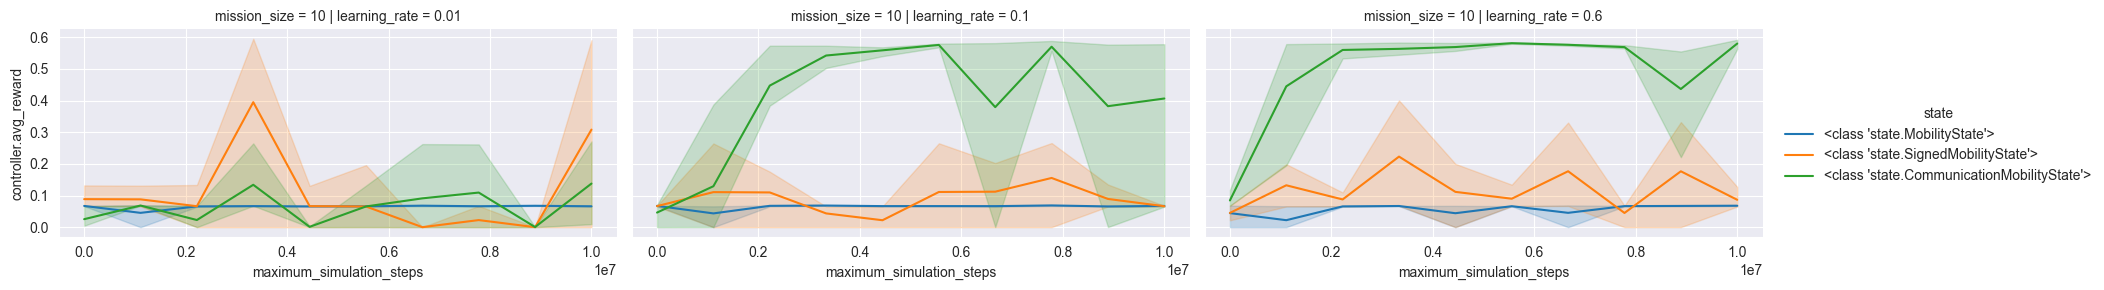

In [152]:
q_learning_testing = result_df[result_df['controller'].str.contains('QLearning') & (result_df['training'] == 'False')]
q_learning_testing['maximum_simulation_steps'] = pd.to_numeric(q_learning_testing['maximum_simulation_steps'])

grid = sns.FacetGrid(q_learning_testing, row='mission_size', col='learning_rate', hue='state', aspect=2)
grid.map_dataframe(sns.lineplot, x='maximum_simulation_steps', y='controller.avg_reward')
grid.add_legend()
plt.show()

In [150]:
q_learning_training = result_df[result_df['controller'].str.contains('QLearning') & (result_df['training'] == 'True')]
q_learning_training.sort_values('maximum_simulation_steps', axis=1).groupby('maximum_simulation_steps')['avg_throughput'].mean().plot()

KeyError: 'maximum_simulation_steps'

In [ ]:
dadca = result_df[result_df['controller'].str.contains('Dadca')]
dadca.groupby('maximum_simulation_steps')['avg_throughput'].mean().plot()